In [64]:
# Import Pandas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, minmax_scale
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_score
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load Movies Metadata
df = pd.read_csv('data.csv')

# 1 Réaliser l'analyse exploratoire des données

In [3]:
df.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN


In [4]:
print(df.shape)
#print(metadata.dtypes)

(569, 33)


In [5]:
print(df.describe(include='all'))

                  id diagnosis  radius_mean  texture_mean  perimeter_mean  \
count   5.690000e+02       569   569.000000    569.000000      569.000000   
unique           NaN         2          NaN           NaN             NaN   
top              NaN         B          NaN           NaN             NaN   
freq             NaN       357          NaN           NaN             NaN   
mean    3.037183e+07       NaN    14.127292     19.289649       91.969033   
std     1.250206e+08       NaN     3.524049      4.301036       24.298981   
min     8.670000e+03       NaN     6.981000      9.710000       43.790000   
25%     8.692180e+05       NaN    11.700000     16.170000       75.170000   
50%     9.060240e+05       NaN    13.370000     18.840000       86.240000   
75%     8.813129e+06       NaN    15.780000     21.800000      104.100000   
max     9.113205e+08       NaN    28.110000     39.280000      188.500000   

          area_mean  smoothness_mean  compactness_mean  concavity_mean  \
c

On peut supprimer la colonne "Unamed: 32"  et ensuite les lignes comportant des 'NAN'

# question 2

In [6]:
df = df.drop(['Unnamed: 32'],axis=1)                  # ou del df['Unnamed: 32']
df.shape


(569, 32)

In [7]:
#df = df.dropna()

# Question3

In [8]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

# 2 Visualiser les données

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'radius_mean'}>,
        <AxesSubplot:title={'center':'texture_mean'}>,
        <AxesSubplot:title={'center':'perimeter_mean'}>,
        <AxesSubplot:title={'center':'area_mean'}>,
        <AxesSubplot:title={'center':'smoothness_mean'}>],
       [<AxesSubplot:title={'center':'compactness_mean'}>,
        <AxesSubplot:title={'center':'concavity_mean'}>,
        <AxesSubplot:title={'center':'concave points_mean'}>,
        <AxesSubplot:title={'center':'symmetry_mean'}>,
        <AxesSubplot:title={'center':'fractal_dimension_mean'}>,
        <AxesSubplot:title={'center':'radius_se'}>],
       [<AxesSubplot:title={'center':'texture_se'}>,
        <AxesSubplot:title={'center':'perimeter_se'}>,
        <AxesSubplot:title={'center':'area_se'}>,
        <AxesSubplot:title={'center':'smoothness_se'}>,
        <AxesSubplot:title={'center':'compactness_se'}>,
        <AxesSubplot:title={'center':'concavity_se'}>],

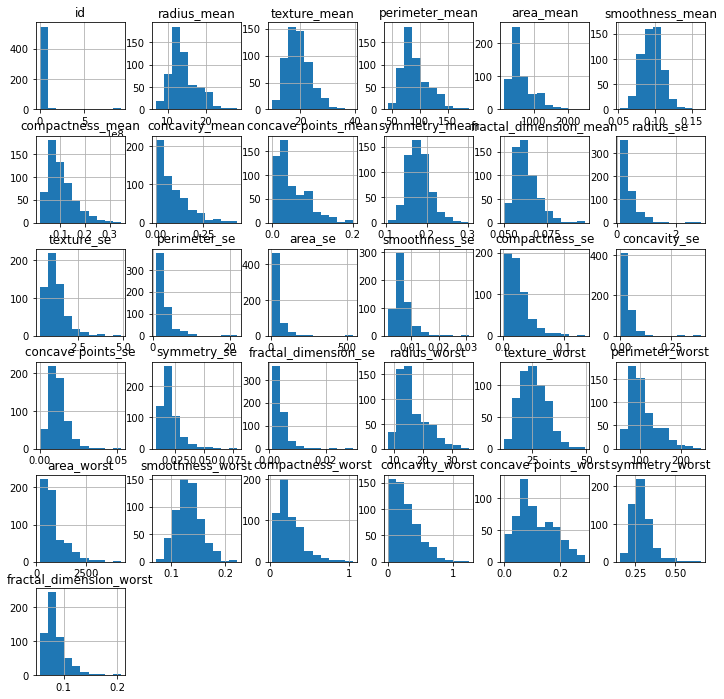

In [9]:
df.hist(figsize=(12, 12))

# 3 Déclarer le vecteur de caractéristiques et la variable cible

In [10]:
    target = df['diagnosis']
    target.replace(to_replace = dict(M = 1, B = 0), inplace = True)

In [11]:
data = df[df.columns[2:32]]
data.shape

(569, 30)

In [12]:
data.head(3)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


# 4 Divisez les données en un ensemble d'entraînement et de test séparé

In [84]:
xtrain, xtest, ytrain, ytest = train_test_split(data, target, train_size=0.8, random_state=42)

# 5 Feature engineering (Ingénierie des fonctionnalités)
processus de transformation des données brutes en fonctionnalités utiles qui nous aident à mieux comprendre notre modèle et à augmenter sa puissance prédictive : tips : utiliser .isnull().sum()
Nous supposons que des données sont manquantes aléatoirement. Deux méthodes peuvent être utilisées pour imputer les valeurs manquantes. L'une est l'imputation moyenne ou médiane et l'autre est l'imputation par échantillon aléatoire. Lorsqu'il y a des valeurs aberrantes dans l'ensemble de données, nous devrions utiliser 


In [85]:
data.isnull().sum()                     ####  Il n'y a pas de données manquantes

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

# 6 Feature scaling

In [86]:
sc = StandardScaler()
sc.fit(xtrain)
xtrain_sc = sc.transform(xtrain)
xtest_sc = sc.transform(xtest)        #à voir

In [87]:
smima_train = minmax_scale(xtrain)
smima_test = minmax_scale(xtest)
#smima.fit(xtrain)
#xtrain_mima = smima.transform(xtrain)
#xtest_mima = smima.transform(xtest)

# 7 Ajuster le classificateur à l'ensemble d'entraînement

In [88]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=11)

# 8 Prédire les résultats du test (predict() et predict_proba())

In [89]:
ypred = knn.predict(xtest)
ypred_proba = knn.predict_proba(xtest)
print(ypred[:10])
print(ypred_proba[:10])

[0 1 1 0 0 1 1 1 0 0]
[[0.81818182 0.18181818]
 [0.         1.        ]
 [0.         1.        ]
 [1.         0.        ]
 [1.         0.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.09090909 0.90909091]
 [1.         0.        ]
 [0.90909091 0.09090909]]


# 9 Vérifiez le score de précision

In [90]:


knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(xtrain, ytrain)

print('Sans Standart Scaler',knn.score(xtest,ytest))
print(knn.score(xtrain,ytrain))      #??????????? score infèrieur...

knn.fit(xtrain_sc,ytrain)
print('Avec Standart Scaler',knn.score(xtest_sc,ytest))

Sans Standart Scaler 0.9824561403508771
0.9318681318681319
Avec Standart Scaler 0.956140350877193


# 10 Reconstruire le modèle de classification kNN en utilisant différentes valeurs de k 
(vous pouvez par exemple  augmenter la valeur de k et voir son effet sur la précision)

In [91]:
error = 1 - knn.score(xtest, ytest)
print('Erreur: %f' % error)
print(knn.score(xtest, ytest))
print(100*(1-knn.score(xtest, ytest)))

Erreur: 0.622807
0.37719298245614036
62.28070175438596


In [92]:
print(xtrain.shape)
print(xtest.shape)

(455, 30)
(114, 30)


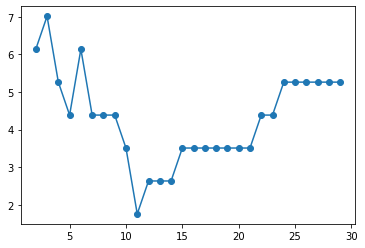

In [93]:
errors = []
for k in range(2,30):
    knn = KNeighborsClassifier(k)
    errors.append(100*(1 - knn.fit(xtrain, ytrain).score(xtest, ytest)))
plt.plot(range(2,30), errors, 'o-')
plt.show()

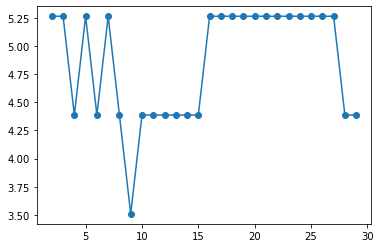

In [94]:
errors = []
for k in range(2,30):
    knn = KNeighborsClassifier(k)
    errors.append(100*(1 - knn.fit(xtrain_sc, ytrain).score(xtest_sc, ytest)))
plt.plot(range(2,30), errors, 'o-')
plt.show()

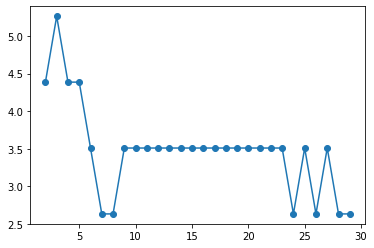

In [95]:
errors = []
for k in range(2,30):
    knn = KNeighborsClassifier(k)
    errors.append(100*(1 - knn.fit(smima_train, ytrain).score(smima_test, ytest)))
plt.plot(range(2,30), errors, 'o-')
plt.show()

# 11 Matrice de confusion.

In [96]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(xtrain,ytrain)
print(knn.score(xtest,ytest))
print(knn.score(xtest_sc,ytest))
print(knn.score(smima_test,ytest))

0.9824561403508771
0.6228070175438597
0.6228070175438597


In [97]:
#print(precision_score(ytest, ypred))
print(confusion_matrix(ytest, ypred))
#print(classification_report(ytest, ypred))

[[71  0]
 [ 2 41]]


# 12 Métriques de classification.
rapport de classification : affiche les scores de précision, de rappel, de f1 et de support du modèle
Nous pouvons classer les observations par probabilité de cancer bénin ou malin.


In [98]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



Prédisez les probabilités. Pour cela, choisissez la classe avec la probabilité la plus élevée
Niveau de seuil de classification : Il existe un seuil de classification de 0,5.
Classe 4 - la probabilité de cancer malin est prédite si la probabilité est> 0,5.
Classe 2 - la probabilité de cancer bénin est prévue si la probabilité <0,5.


Class 2

# 13 ROC - AUC.

In [103]:
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve


In [117]:
fpr, tpr, thresholds = roc_curve(ytest, ypred, pos_label=1)
y_pred_1 = knn.predict_proba(xtest)[:, 1]

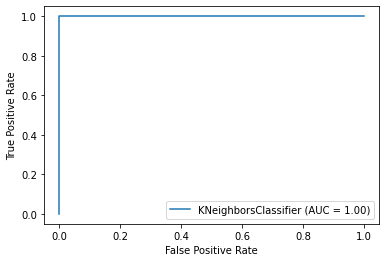

In [119]:
plot_roc_curve(knn, xtest, ypred)
plt.show()

In [79]:
model = KNeighborsClassifier()
cross_val_score(model, xtrain, ytrain, cv=5, scoring='accuracy')

array([0.93406593, 0.9010989 , 0.95604396, 0.9010989 , 0.92307692])

#### Faire une cross validation sur du KNN!!!!!!
#### On à besoin de tout les voisins pour l'entrainement et là on les sépare...............!!!!??????????? Mais bon Ok 

In [80]:
val_score = []
for k in range(1, 50):
    score = cross_val_score(KNeighborsClassifier(k), xtrain, ytrain, cv=5).mean()
    val_score.append(score)

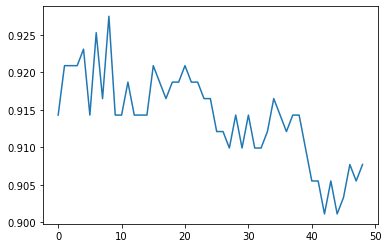

In [81]:
plt.plot(val_score)